In [4]:
#%%writefile "consistency.py"
import click 
@click.command()
@click.option('--a_file',type=str)
@click.option('--a_name',type=str)
@click.option('--b_file',type=str)
@click.option('--b_name',type=str)
@click.option('--kind',type=str)
def consistency_scatter(a_file,a_name,b_file,b_name,kind):
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as font_manager
    font_dirs = ["/public/home/lizw/software/font"]
    font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)
    plt.rcParams["font.family"] = "Arial"
    a_data = pd.read_table(a_file,header=None)
    b_data = pd.read_table(b_file,header=None)
    data_merge = pd.concat([a_data,b_data],axis=1)
    data_merge.columns=[a_name,b_name]
    plt.figure(figsize=(6,6))
    plt.scatter(data = data_merge,x=a_name,y=b_name,s=0.2,color='r')
    scalemax = data_merge.max().max()
    scalemin = data_merge.min().min()
    plt.xlabel(f'{kind}({a_name})')
    plt.xlabel(f'{kind}({b_name})')
    plt.plot((scalemin,scalemax), (scalemin, scalemax), ls='--',c='k')
    r = data_merge[a_name].corr(data_merge[b_name])
    plt.text(scalemin-0.01,scalemin-0.01,f'Pearson r {r}')
    plt.savefig(f'{a_name}_{b_name}_{kind}_consistency_scatter.svg',format='svg',bbox_inches = 'tight')
if __name__ == '__main__':
    consistency_scatter()

Usage: ipykernel_launcher.py [OPTIONS]
Try 'ipykernel_launcher.py --help' for help.

Error: No such option: -f
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/public/home/lizw/anaconda3/lib/python3.7/site-packages/click/parser.py", line 514, in _process_opts
    self._match_long_opt(norm_long_opt, explicit_value, state)
  File "/public/home/lizw/anaconda3/lib/python3.7/site-packages/click/parser.py", line 398, in _match_long_opt
    raise NoSuchOption(opt, possibilities=possibilities, ctx=self.ctx)
click.exceptions.NoSuchOption: No such option: -f

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/public/home/lizw/anaconda3/lib/python3.7/site-packages/click/core.py", line 1061, in main
    with self.make_context(prog_name, args, **extra) as ctx:
  File "/public/home/lizw/anaconda3/lib/python3.7/site-packages/click/core.py", line 923, in make_context
    self.parse_args(ctx, args)
  File "/public/home/lizw/anaconda3/lib/python3.7/site-packages/click/core.py", line 1376, in parse_args
    opts, args, param_order = parser.parse_args(args=a

TypeError: object of type 'NoneType' has no len()

In [393]:
def consistency_scatter(a_file,a_name,b_file,b_name,kind):
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as font_manager
    font_dirs = ["/public/home/lizw/software/font"]
    font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)
    plt.rcParams["font.family"] = "Arial"
    a_data = pd.read_table(a_file,header=None)
    b_data = pd.read_table(b_file,header=None)
    data_merge = pd.concat([a_data,b_data],axis=1)
    data_merge.columns=[a_name,b_name]
    plt.figure(figsize=(6,6))
    plt.scatter(data = data_merge,x=a_name,y=b_name,s=0.2,color='r')
    scalemax = data_merge.max().max()
    scalemin = data_merge.min().min()
    plt.xlabel(f'{kind}({a_name})')
    plt.xlabel(f'{kind}({b_name})')
    plt.plot((scalemin,scalemax), (scalemin, scalemax), ls='--',c='k')
    r = data_merge[a_name].corr(data_merge[b_name])
    plt.text(scalemin-0.01,scalemin-0.01,f'Pearson r {r}')
    plt.savefig(f'{a_name}_{b_name}_{kind}_consistency_scatter.svg',format='svg',bbox_inches = 'tight')

In [394]:
from consistency import consistency_scatter

In [395]:
a_file = '/public/home/lizw/task/pore_c/DpnII_hic/eigenvector/KR_BP_RE_5000_chrall.txt'
a_name = 'Hi-C'
b_file = '/public/home/lizw/task/pore_c/porec_result/result4/new_pipeline_result/juicebox/porec_KR_BP_RE_5000_chrall.txt'
b_name = 'Pore-C'
kind = 'Eigenvector'

In [396]:
import matplotlib.font_manager as font_manager
font_dirs = ["/public/home/lizw/software/font"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 30
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [413]:
#扩大尺度后再试
import pandas as pd
def consistency_insulation(object1,object2,resolution,label1,label2):
    fig, ax = plt.subplots(1,figsize=(10,10))
    column = f'log2_insulation_score_{resolution}'
    plt.scatter(object1[column],object2[column],s=2,color='orange')
    scalemax = max(object1[column].max(),object2[column].max())
    scalemin = min(object1[column].min(),object2[column].min())
    plt.plot((scalemin,scalemax), (scalemin, scalemax), ls='--',c='k')
    plt.xlim(scalemin,scalemax)
    plt.ylim(scalemin,scalemax)
    plt.xlabel(f'Insulation Score log2({label1})')
    plt.ylabel(f'Insulation Score log2({label2})')
    r = object1[column].corr(object2[column])
    plt.text(scalemin+(scalemax-scalemin)/5,scalemax+(scalemax-scalemin)/20,f'Pearson r {r}')
    plt.axis('equal')
    plt.savefig(f'/public/home/lizw/task/pore_c/compare/{label1}_{label2}_log2_insulation_score.png',format='png',dpi=300,bbox_inches = 'tight')

In [436]:
def consistency_epigenetics(object1,object2,label1,label2):
    fig, ax = plt.subplots(1,figsize=(10,10))
    column = 'E1'
    plt.scatter(object1[column],object2[column],s=2,color='orange')
    scalemax = max(object1[column].max(),object2[column].max())
    scalemin = min(object1[column].min(),object2[column].min())
    plt.plot((scalemin,scalemax), (scalemin, scalemax), ls='--',c='k')
    plt.xlim(scalemin,scalemax)
    plt.ylim(scalemin,scalemax)
    plt.xlabel(f'Eigenvector({label1})')
    plt.ylabel(f'Eigenvector({label2})')
    r = object1[column].corr(object2[column])
    plt.text(scalemin+(scalemax-scalemin)/5,scalemax+(scalemax-scalemin)/20,f'Pearson r {r}')
    plt.axis('equal')
    plt.savefig(f'/public/home/lizw/task/pore_c/compare/{label1}_{label2}_eigenvector.png',format='png',dpi=300,bbox_inches = 'tight')

In [415]:
porec_insu = pd.read_table('/public/home/lizw/task/pore_c/compare/zb_DpnII_run04_TAIR10_unphased.matrix_insulation.tsv')
hic_insu = pd.read_table('/public/home/lizw/task/pore_c/compare/MAPQ_1_1000_insulation.tsv')
run01_rep1_insu = pd.read_table('/public/home/lizw/task/pore_c/compare/zb_DpnII_run01_TAIR10_unphased.matrix_insulation.tsv')
run03_rep2_insu = pd.read_table('/public/home/lizw/task/pore_c/compare/zb_DpnII_run03_TAIR10_unphased.matrix_insulation.tsv')

porec_epi = pd.read_table('/public/home/lizw/task/pore_c/compare/zb_DpnII_run04_TAIR10_unphased.matrix.cis.vecs.tsv')
hic_epi = pd.read_table('/public/home/lizw/task/pore_c/compare/MAPQ_1_1000.cis.vecs.tsv')
run01_rep1_epi = pd.read_table('/public/home/lizw/task/pore_c/compare/zb_DpnII_run01_TAIR10_unphased.matrix.cis.vecs.tsv')
run03_rep2_epi = pd.read_table('/public/home/lizw/task/pore_c/compare/zb_DpnII_run03_TAIR10_unphased.matrix.cis.vecs.tsv')

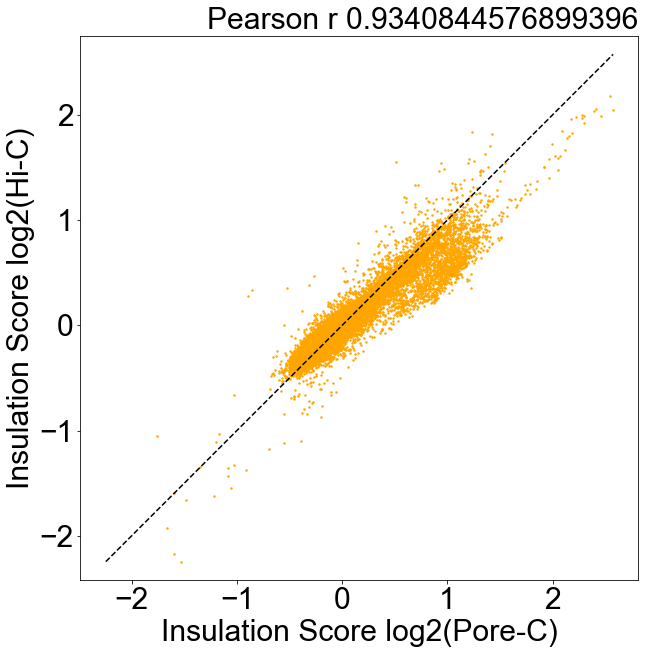

In [416]:
consistency_insulation(porec_insu,hic_insu,100000,'Pore-C','Hi-C')

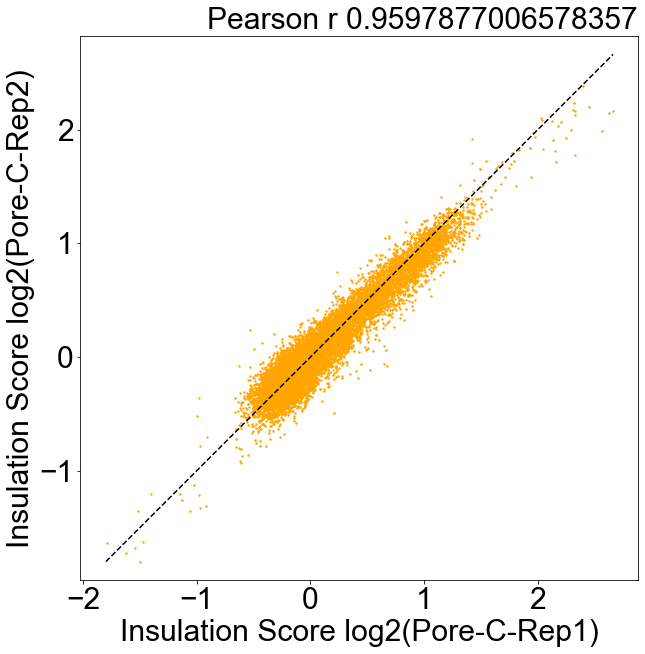

In [417]:
consistency_insulation(run01_rep1_insu,run03_rep2_insu,100000,'Pore-C-Rep1','Pore-C-Rep2')

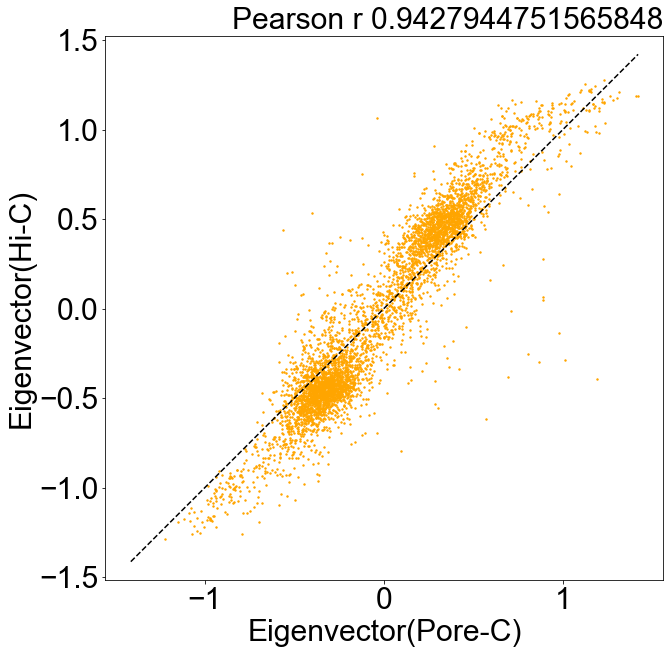

In [447]:
porec_epi = pd.read_table(f'/public/home/lizw/task/pore_c/compare/zb_DpnII_run04_TAIR10_unphased.matrix_25000.cis.vecs.tsv')
hic_epi = pd.read_table(f'/public/home/lizw/task/pore_c/compare/MAPQ_1_1000_25000.cis.vecs.tsv')
consistency_epigenetics(porec_epi,hic_epi,'Pore-C','Hi-C')

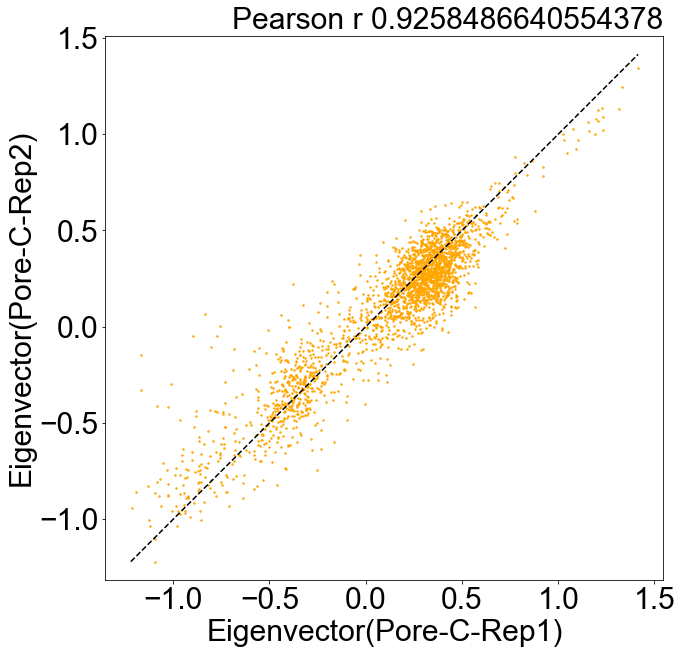

In [421]:
run01_rep1_epi = pd.read_table(f'/public/home/lizw/task/pore_c/compare/zb_DpnII_run01_TAIR10_unphased.matrix_50000.cis.vecs.tsv')
run03_rep2_epi = pd.read_table(f'/public/home/lizw/task/pore_c/compare/zb_DpnII_run03_TAIR10_unphased.matrix_50000.cis.vecs.tsv')
consistency_epigenetics(run01_rep1_epi,run03_rep2_epi,'Pore-C-Rep1','Pore-C-Rep2')

In [432]:
import cooler
hic_clr = cooler.Cooler('/public/home/lizw/task/pore_c/DpnII_hic2/4DN_cool/MAPQ_1_1000.mcool::/resolutions/50000')
porec_clr = cooler.Cooler('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/matrix/zb_DpnII_run04_TAIR10_unphased.matrix.mcool::/resolutions/50000')
run01_rep1_clr = cooler.Cooler('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/matrix/zb_DpnII_run01_TAIR10_unphased.matrix.mcool::/resolutions/50000')
run03_rep2_clr = cooler.Cooler('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/matrix/zb_DpnII_run03_TAIR10_unphased.matrix.mcool::/resolutions/50000')

In [430]:
def consistency_contact(clr1,clr2,label1,label2):
    def contact_cis_offdia(clr):
        contact_all_df = pd.DataFrame([])
        for i in clr.chromnames:
            matrix = clr.matrix(balance=True).fetch(i)
            np.fill_diagonal(matrix,0)
            matrix_triu = np.triu(matrix)
            contact= np.nanmean(matrix_triu,axis=1)
            contact_df = pd.DataFrame(contact)
            contact_df_nor = contact_df/contact_df.max()
            contact_all_df = contact_all_df.append(contact_df_nor)
        return contact_all_df
    contact_all_df1 = contact_cis_offdia(clr1)
    contact_all_df2 = contact_cis_offdia(clr2)
    fig, ax = plt.subplots(1,figsize=(10,10))
    scalemax = max(contact_all_df1[0].max(),contact_all_df2[0].max())
    scalemin = min(contact_all_df1[0].min(),contact_all_df2[0].min())
    plt.scatter(contact_all_df1[0],contact_all_df2[0],s=2,color='orange')
    plt.plot((scalemin,scalemax), (scalemin, scalemax), ls='--',c='k')
    r = contact_all_df1[0].corr(contact_all_df2[0])
    plt.text(scalemin+(scalemax-scalemin)/5,scalemax+(scalemax-scalemin)/20,f'Pearson r {r}')
    plt.xlim(scalemin,scalemax)
    plt.ylim(scalemin,scalemax)
    plt.xlabel(f'Balanced Contact({label1})')
    plt.ylabel(f'Balanced Contact({label2})')
    ax = plt.gca()
    ax.ticklabel_format(style='sci', scilimits=(-1,2), axis='both',useMathText=True)
    plt.axis('equal')
    plt.savefig(f'/public/home/lizw/task/pore_c/compare/{label1}_{label2}_balanced_contact.png',format='png',dpi=300,bbox_inches = 'tight')

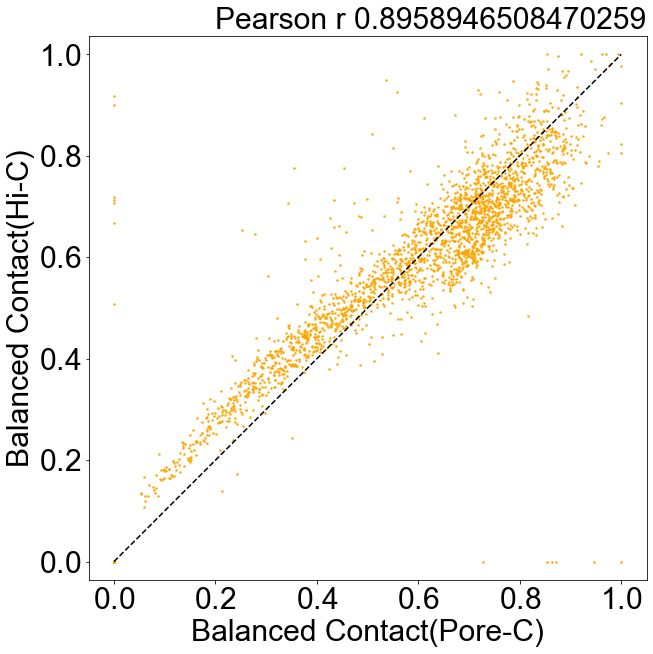

In [434]:
consistency_contact(porec_clr,hic_clr,'Pore-C','Hi-C')

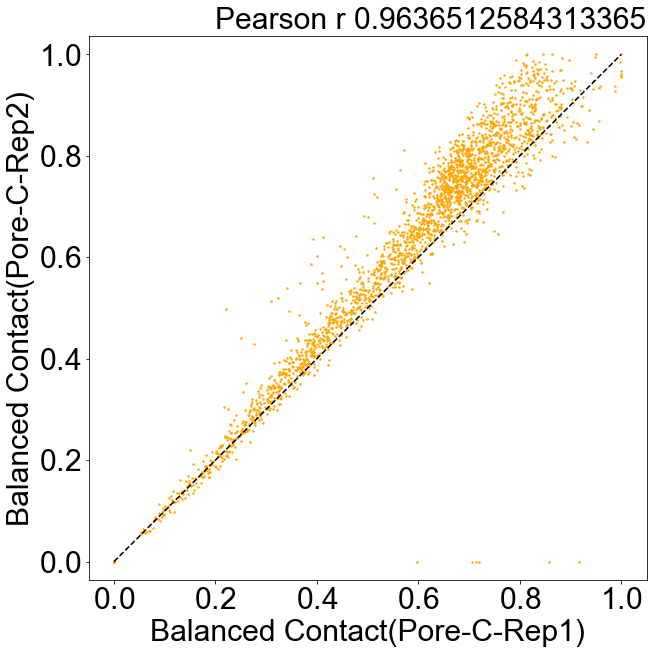

In [435]:
consistency_contact(run01_rep1_clr,run03_rep2_clr,'Pore-C-Rep1','Pore-C-Rep2')